

```
Importar bibliotecas necessárias

```



Carregar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Construção da CNN

In [ ]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())
classificador.add(Dense(units = 56, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 56, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

Compilar o modelo

In [ ]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Pré-processamento


In [ ]:

gerador = ImageDataGenerator(rescale = 1./255,
                             rotation_range = 7,
                             horizontal_flip = True,
                             shear_range = 0.2,
                             height_shift_range = 0.07,
                             zoom_range = 0.2,
                             validation_split=0.1)


Carregar dados


In [1]:

base_treinamento = gerador.flow_from_directory('/content/drive/MyDrive/retrato_outro/training',
                                               target_size = (128, 128),
                                               batch_size = 20,
                                               class_mode = 'binary',
                                               subset = 'training')

base_teste = gerador.flow_from_directory('/content/drive/MyDrive/retrato_outro/validation',
                                         target_size = (128, 128),
                                         batch_size = 20,
                                         class_mode = 'binary',
                                         subset= 'validation')



Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/5
9/9 [==============================] - 37s 4s/step - loss: 1.7110 - accuracy: 0.6333 - val_loss: 0.6691 - val_accuracy: 0.6000
Epoch 2/5
9/9 [==============================] - 7s 687ms/step - loss: 0.9097 - accuracy: 0.7778 - val_loss: 0.7064 - val_accuracy: 0.5500
Epoch 3/5
9/9 [==============================] - 5s 597ms/step - loss: 0.7473 - accuracy: 0.8389 - val_loss: 0.7009 - val_accuracy: 0.6500
Epoch 4/5
9/9 [==============================] - 5s 508ms/step - loss: 0.8442 - accuracy: 0.8333 - val_loss: 0.7544 - val_accuracy: 0.5500
Epoch 5/5
9/9 [==============================] - 6s 716ms/step - loss: 0.7152 - accuracy: 0.8333 - val_loss: 0.8693 - val_accuracy: 0.4000


Treinar o modelo

Epoch 1/5
8/8 [==============================] - 5s 636ms/step - loss: 0.2382 - accuracy: 0.9375 - val_loss: 6.8274 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 6s 738ms/step - loss: 0.3120 - accuracy: 0.9500 - val_loss: 7.3186 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 5s 650ms/step - loss: 0.2468 - accuracy: 0.9750 - val_loss: 6.6537 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 5s 549ms/step - loss: 0.4688 - accuracy: 0.9563 - val_loss: 6.3625 - val_accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 6s 712ms/step - loss: 0.2461 - accuracy: 0.9438 - val_loss: 3.5811 - val_accuracy: 0.5000


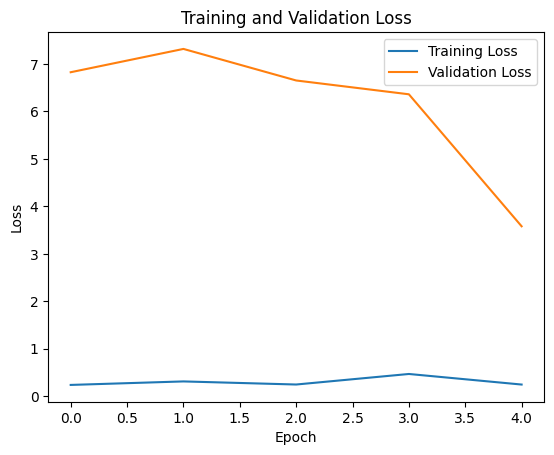

In [10]:
historico = classificador.fit(base_treinamento, epochs = 5, validation_data = base_teste, batch_size=10)
# Extrair perda e acurácia do histórico
loss = historico.history['loss']
val_loss = historico.history['val_loss']
accuracy = historico.history['accuracy']
val_accuracy = historico.history['val_accuracy']

# Plotar perda
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Teste Modelo


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

import numpy as np

#-------------------------------------------------------------------------

# Gerando os padrões da rede função relu e sigmoid(perto de 0 = outro, perto de 1 = retrato)
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3), input_shape = (128, 128, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

gerador = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2,
                                         validation_split=0.2)#Divide em treinamento e teste na proporção 80/20

# A partir daqui estou teianando a rede.

base_treinamento = gerador.flow_from_directory('/content/drive/MyDrive/retrato_outro/training',
                                                           target_size = (128, 128),
                                                           batch_size = 20,
                                                           class_mode = 'binary',
                                                           subset = 'training')#Atribui como parte para treinamento(80% das imagens)
base_teste = gerador.flow_from_directory('/content/drive/MyDrive/retrato_outro/training',
                                               target_size = (128, 128),
                                               batch_size = 20,
                                               class_mode = 'binary',
                                               subset = 'validation')#Atribui como parte para testes(20% das imagens)


# steps_per_epoch = 4000 == POrque tenho 4000 imagens na base Treinamento.
classificador.fit(base_treinamento, epochs = 5, validation_data = base_teste,

                            # validation_steps = 1000 porque tenho 1000 imagens nos testes.
                            validation_steps = 20000 / 20)

#Parte do código que vai testar a imagem nova que chega

imagem_teste = load_img('/content/drive/MyDrive/retrato_outro/training/human/0000.png',
                              target_size = (128,128))
imagem_teste = img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)
previsao = classificador.predict(imagem_teste)

base_treinamento.class_indices



























Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 1.6414 - accuracy: 0.6875

8/8 [==============================] - 6s 606ms/step - loss: 1.6414 - accuracy: 0.6875 - val_loss: 0.6806 - val_accuracy: 0.6500
Epoch 2/5
8/8 [==============================] - 4s 476ms/step - loss: 0.9149 - accuracy: 0.8625
Epoch 3/5
8/8 [==============================] - 6s 641ms/step - loss: 1.5473 - accuracy: 0.8000
Epoch 4/5
8/8 [==============================] - 4s 450ms/step - loss: 0.5573 - accuracy: 0.9250
Epoch 5/5
1/1 [==============================] - 0s 141ms/step


{'human': 0, 'notHuman': 1}